# Predictive Analysis of Mushrooms

From the previous preprocessing and analysis of the mushroom data assignment, I chose <b>odor</b> and <b>gill color</b> as the features that will be useful to predict whether a mushroom is poisonous or edible.

In this assignment, I will use these two features to train models and predict mushrooms separately, then I will compare which of the two features are most important and effective in predicting whether the mushroom is poisonous or edible using the accuracy score.

## Step 1: Load Dataset and Prepare Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in mushroom data and add headers to the columns
mushroom = pd.read_csv('agaricus-lepiota.data',usecols=[0,5,9], header=None)
mushroom.columns = ['target','odor', 'gill-color']
mushroom.head()

,target,odor,gill-color
0,p,p,k
1,e,a,k
2,e,l,n
3,p,p,n
4,e,n,k


In [3]:
# transform target from categorical to numerical using label encoder
# p = 1, e = 0
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mushroom['target'] = le.fit_transform(mushroom['target'])
mushroom.head()

,target,odor,gill-color
0,1,p,k
1,0,a,k
2,0,l,n
3,1,p,n
4,0,n,k


In [4]:
# separate target from other features
target = mushroom['target']
target.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [5]:
# Use One Hot Encoder to transform the categorical features into numeric
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False).set_output(transform='pandas')

In [6]:
# transform odor to columns of numeric
odor = ohe.fit_transform(mushroom[['odor']])
odor.head()

,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# transform gill color to columns of numeric
gill_color = ohe.fit_transform(mushroom[['gill-color']])
gill_color.head()

,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 2: Compare Features with Different Models

### Method 1: Use cross-validation and calculate cross validation accuracy score

In [8]:
from sklearn.model_selection import cross_val_score

#### Model 1: Logistic Regresssion

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

Odor:

In [11]:
odor_logreg_cross = cross_val_score(logreg, odor, target, cv = 10, scoring='accuracy').mean()
print("Cross validation score for logistic regression model with odor feature is: ", odor_logreg_cross)

Cross validation score for logistic regression model with odor feature is:  0.9852239470670568


Gill Color:

In [12]:
gill_color_logreg_cross = cross_val_score(logreg, gill_color, target, cv = 10, scoring='accuracy').mean()
print("Cross validation score for logistic regression model with gill color feature is: ", gill_color_logreg_cross)

Cross validation score for logistic regression model with gill color feature is:  0.799549197462418


In logistic regression model with cross validation method, the <b>Odor</b> feature more accurately predicts whether or not a mushroom is poisonous compared to Gill Color feature.

#### Model 2: K Neighbors Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Odor:

In [14]:
odor_knn_cross = cross_val_score(knn, odor, target, cv = 10, scoring='accuracy').mean()
print("Cross validation score for k neighbors classifier model with odor feature is: ", odor_knn_cross)

Cross validation score for k neighbors classifier model with odor feature is:  0.9537356321839081


Gill Color:

In [15]:
gill_color_knn_cross = cross_val_score(knn, gill_color, target, cv = 10, scoring='accuracy').mean()
print("Cross validation score for k neighbors classifier model with gill color feature is: ", gill_color_knn_cross)

Cross validation score for k neighbors classifier model with gill color feature is:  0.7225242215476343


In k Neighbors Classifier model with cross validation method, the <b>Odor</b> feature more accurately predicts whether or not a mushroom is poisonous compared to Gill Color feature.

#### Method 3: Random Forest Classifier

In [16]:
# import Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Odor:

In [17]:
odor_rfc_cross = cross_val_score(rfc, odor, target, cv = 10, scoring='accuracy').mean()
print("Cross validation score for random forest classifier model with odor feature is: ", odor_rfc_cross)

Cross validation score for random forest classifier model with odor feature is:  0.9852239470670568


Gill Color:

In [18]:
gill_color_rfc_cross = cross_val_score(rfc, gill_color, target, cv = 10, scoring='accuracy').mean()
print("Cross validation score for random forest classifier model with gill color feature is: ", gill_color_rfc_cross)

Cross validation score for random forest classifier model with gill color feature is:  0.799549197462418


In Random Forest model with cross validation method, the <b>Odor</b> feature more accurately predicts whether or not a mushroom is poisonous compared to Gill Color feature.

### Method 2: Use Train/Test Split

In [19]:
# use train test split and separate the dataset into training set and testing set
from sklearn.model_selection import train_test_split

odor_x_train,odor_x_test,odor_y_train,odor_y_test = train_test_split(odor, target, random_state=4)
gill_color_x_train,gill_color_x_test,gill_color_y_train,gill_color_y_test = train_test_split(gill_color, target, random_state=4)

#### Model 1: Logistic Regression

Odor:

In [21]:
# train the models with Logistic Regression using odor dataset
odor_logReg_tts = LogisticRegression(solver='liblinear')
odor_logReg_tts.fit(odor_x_train, odor_y_train)

LogisticRegression(solver='liblinear')

In [22]:
# Make the prediction using the trained model
odor_y_pred_logReg_tts = odor_logReg_tts.predict(odor_x_test)

#calculate the accuracy score
from sklearn import metrics
accuracy_score_odor_logReg_tts = metrics.accuracy_score(odor_y_test, odor_y_pred_logReg_tts)
print("The accuracy score of Logistic Regression using Train/Test Split method for Odor feature: ", accuracy_score_odor_logReg_tts)

The accuracy score of Logistic Regression using Train/Test Split method for Odor feature:  0.9857213195470211


Gill Color:

In [23]:
# train the models with Logistic Regression for gill color feature dataset
gill_color_logReg_tts = LogisticRegression(solver='liblinear')
gill_color_logReg_tts.fit(gill_color_x_train, gill_color_y_train)

LogisticRegression(solver='liblinear')

In [24]:
# Make the prediction using the trained model
gill_color_y_pred_logReg_tts = gill_color_logReg_tts.predict(gill_color_x_test)

#calculate the accuracy score
from sklearn import metrics
accuracy_score_gill_color_logReg_tts = metrics.accuracy_score(gill_color_y_test, gill_color_y_pred_logReg_tts)
print("The accuracy score of Logistic Regression using Train/Test Split method for Gill Color feature: ", accuracy_score_gill_color_logReg_tts)

The accuracy score of Logistic Regression using Train/Test Split method for Gill Color feature:  0.8005908419497785


For logistic regression model using Train/Test split method, the <b>odor</b> feature is more significant and has high prediction accuracy score than gill color feature.

#### Model 2: K Neighbors Classifier Model

Odor feature:

In [25]:
# find the best value for k between 1 and 30
k_range = range(1, 26)
odor_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(odor_x_train, odor_y_train)
    odor_y_pred = knn.predict(odor_x_test)
    odor_scores.append(metrics.accuracy_score(odor_y_test, odor_y_pred))

Text(0, 0.5, 'Testing Accuracy for Odor Feature')

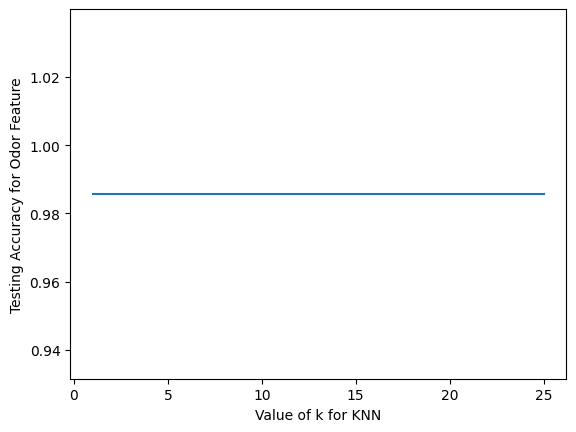

In [26]:
# plot the scores and range
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, odor_scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy for Odor Feature")

Any k value from 1 to 25 all produce the same accuracy score for the odor feature.

Gill Color feature:

In [27]:
gill_color_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(gill_color_x_train, gill_color_y_train)
    gill_color_y_pred = knn.predict(gill_color_x_test)
    gill_color_scores.append(metrics.accuracy_score(gill_color_y_test, gill_color_y_pred))

Text(0, 0.5, 'Testing Accuracy for Gill Color Feature')

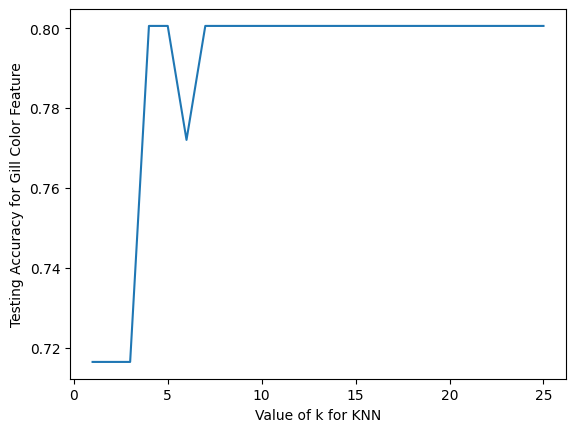

In [28]:
plt.plot(k_range, gill_color_scores)
plt.xlabel("Value of k for KNN")
plt.ylabel("Testing Accuracy for Gill Color Feature")

For gill color feature, k value of 4, 5, and from 8 to 25 all have the highest accuracy score.

I will choose the same k value to better compare the odor and gill color features' significance on determining if the mushroom is poisonous or not. I choose 9 as the k value for both Odor and Gill Color, since they both are at highest accuracy score when value equals 9.

Odor feature:

In [29]:
# create an instance of k neighbor classifier
odor_knn_tts = KNeighborsClassifier(n_neighbors=9)
odor_knn_tts.fit(odor_x_train, odor_y_train)
odor_y_pred_knn_tts = odor_knn_tts.predict(odor_x_test)

odor_accuracy_score_knn_tts = metrics.accuracy_score(odor_y_test, odor_y_pred_knn_tts)
print("The accuracy score of K Neighbor Classifier Model using Train/Test Split method for Odor feature: ", odor_accuracy_score_knn_tts)

The accuracy score of K Neighbor Classifier Model using Train/Test Split method for Odor feature:  0.9857213195470211


Gill Color feature:

In [31]:
# create an instance of k neighbor classifier
gill_color_knn_tts = KNeighborsClassifier(n_neighbors=9)
gill_color_knn_tts.fit(gill_color_x_train, gill_color_y_train)
gill_color_y_pred_knn_tts = gill_color_knn_tts.predict(gill_color_x_test)

gill_color_accuracy_score_knn_tts = metrics.accuracy_score(gill_color_y_test, gill_color_y_pred_knn_tts)
print("The accuracy score of K Neighbor Classifier Model using Train/Test Split method for Gill Color feature: ", gill_color_accuracy_score_knn_tts)

The accuracy score of K Neighbor Classifier Model using Train/Test Split method for Gill Color feature:  0.8005908419497785


The Odor feature still has the higher accuracy score compared to Gill Color for  K Neighbor Classifier Model with Train/Test Split method.

#### Method 3: Random Forest Algorithm

Odor feature:

In [33]:
# create an instance of random forest classifier
odor_rf_tts = RandomForestClassifier()
odor_rf_tts.fit(odor_x_train, odor_y_train)

RandomForestClassifier()

In [34]:
# predict 
odor_y_pred_rf_tts = odor_rf_tts.predict(odor_x_test)

odor_accuracy_score_rf_tts = metrics.accuracy_score(odor_y_test, odor_y_pred_rf_tts)
print("The accuracy score of Random Forest Classifier Model using Train/Test Split method for Odor Feature: ", odor_accuracy_score_rf_tts)

The accuracy score of Random Forest Classifier Model using Train/Test Split method for Odor Feature:  0.9857213195470211


Gill Color feature:

In [35]:
# create an instance of random forest classifier
gill_color_rf_tts = RandomForestClassifier()
gill_color_rf_tts.fit(gill_color_x_train, gill_color_y_train)

RandomForestClassifier()

In [36]:
# predict 
gill_color_y_pred_rf_tts = gill_color_rf_tts.predict(gill_color_x_test)

gill_color_accuracy_score_rf_tts = metrics.accuracy_score(gill_color_y_test, gill_color_y_pred_rf_tts)
print("The accuracy score of Random Forest Classifier Model using Train/Test Split method for Gill Color Feature: ", gill_color_accuracy_score_rf_tts)

The accuracy score of Random Forest Classifier Model using Train/Test Split method for Gill Color Feature:  0.8005908419497785


The Odor feature still has the higher accuracy score compared to Gill Color for Random Forest Classifier Model with Train/Test Split method.

## Conclusion

I calculated the accuracy score for both the odor and gill color features separately, using the logistic regression, k neighbors classifier, and random forest classifier models in Cross-Validation and Train/Test Split methods. The models that were trained with odor feature all have higher accuracy scores compared to models that were trained with the gill color feature. <b>The odor feature most accurately predicts whether or not a mushroom is poisonous.</b>

However, there are other ways to analyze the features that I can explore. First, I can use other classification models, such as the Support Vector Machines, Decision Trees, and Naive Bayes models. Additionally, using both the odor and gill color features may or may not have a higher prediction accuracy score compared to using only one feature to predict the mushroom. I will have to train and predict with both features and compare the accuracy scores with models that were trained with the odor feature only, to analyze whether the gill color feature is significant enough to be include in the model training.